# `Random Forest Algorithm`
`Random Forest` is a **popular** machine learning algorithm that belongs to the `supervised learning technique`.<br>
It can be used for both `Classification` and `Regression` problems in ML.<br>
It is based on the concept of `ensemble learning`, which is a process of combining multiple classifiers<br>
to solve a complex problem and to improve the performance of the model.

---

### 1- How `Random Forest` Works ?

As the name suggests, *`"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset."`*<br> Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

![](https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm.png)

### 2- How is `Random Forest` build trees ?

`Random Forest` builds each tree in the ensemble using a technique called [`bagging (Bootstrap Aggregating)`](https://www.ibm.com/topics/bagging#:~:text=Bagging%2C%20also%20known%20as%20bootstrap,be%20chosen%20more%20than%20once.).<br>
The basic idea behind `bagging` is to *train each tree on a different subset of the training data*,<br>
and then *combine their predictions to reduce the variance and improve the accuracy of the model*.

### 3- Implementation 

Suppose we have a dataset of 10 examples with 2 features (X1 and X2) and a binary target variable (y), as shown below:

| X1  | X2  | y  |
| --- | --- | -- |
| 1.2 | 0.7 | 0  |
| 0.5 | 1.0 | 0  |
| 2.0 | 3.5 | 1  |
| 3.0 | 2.5 | 1  |
| 2.5 | 1.5 | 1  |
| 1.0 | 2.5 | 0  |
| 3.5 | 2.0 | 1  |
| 2.0 | 2.0 | 0  |
| 1.5 | 1.0 | 0  |
| 3.0 | 3.0 | 1  |

In [1]:
import numpy as np # Import NumPy for numeric computing

# Define the input features X and the target variable y as NumPy arrays
X = np.array([[1.2, 0.7],
              [0.5, 1.0],
              [2.0, 3.5],
              [3.0, 2.5],
              [2.5, 1.5],
              [1.0, 2.5],
              [3.5, 2.0],
              [2.0, 2.0],
              [1.5, 1.0],
              [3.0, 3.0]])

y = np.array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1])

#### `A- Split data to Train & Test`

In [33]:
''' Split the data into training and test sets '''
from sklearn.model_selection import train_test_split # Import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) # Split the data

In [34]:
X_train # Display the training data

array([[3.5, 2. ],
       [3. , 2.5],
       [0.5, 1. ],
       [1.2, 0.7],
       [2. , 2. ],
       [2.5, 1.5],
       [3. , 3. ]])

#### `B- Split training data to Trees`

you can find the native code for decision tree [here](https://github.com/Elghandour-eng/Supervised_ML_Model/blob/main/Classification/Decision%20Trees.ipynb)

In [35]:
''''
Random feature selection:
We randomly select 1 feature at each split. 
For example, at the root node of the first tree, we randomly select either X1 or X2 to determine the best split.
'''
# Build Tree 1
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
tree_1_data = X_train[:4, :]
tree_1_labels = y_train[:4]
print(" Tree 1 data: \n", tree_1_data, "\n Tree 1 labels: \n", tree_1_labels)
from sklearn import tree # Import tree module from scikit-learn
tree_1 = tree.DecisionTreeClassifier(random_state=10) # Instantiate a Decision Tree mode 
tree_1.fit(tree_1_data, tree_1_labels) # Fit the model to the data

 Tree 1 data: 
 [[3.5 2. ]
 [3.  2.5]
 [0.5 1. ]
 [1.2 0.7]] 
 Tree 1 labels: 
 [1 1 0 0]


DecisionTreeClassifier(random_state=10)

In [36]:
# Build Tree 2
tree_2_data = X_train[4:, :]
tree_2_labels = y_train[4:]
tree_2 = tree.DecisionTreeClassifier(random_state=10) # Instantiate a Decision Tree mode
tree_2.fit(tree_2_data, tree_2_labels) # Fit the model to the data

DecisionTreeClassifier(random_state=10)

In [37]:
# Make predictions on the test set

# Tree 1 predictions
tree_1.predict(X_test)
print("Tree 1 predictions: \n", tree_1.predict(X_test))

# Tree 2 predictions
tree_2.predict(X_test)
print("Tree 2 predictions: \n", tree_2.predict(X_test))




Tree 1 predictions: 
 [0 1 1]
Tree 2 predictions: 
 [0 0 0]


#### `C- Take Majority`

To make the final prediction, we can take the majority vote of the individual tree predictions, which in this case would result in a final prediction of 1.

In [ ]:
# For each observation, we take the majority vote from the predictions of the two trees

# For example, for the first observation, we have 2 predictions: 0 and 0.
# Since 0 is the majority vote, we assign 0 as the final prediction for the first observation.

    
def majority_vote(predictions):
    votes = [0, 0]  # Initialize the vote count for each class
    for tree_prediction in predictions:
        if tree_prediction[0] > tree_prediction[1]:
            votes[0] += 1  # Class 0 got a vote
        else:
            votes[1] += 1  # Class 1 got a vote

    # Select the class with the most votes as the final prediction
    if votes[0] > votes[1]:
        final_prediction = 0
    else:
        final_prediction = 1
    return final_prediction

### SkLearn Example

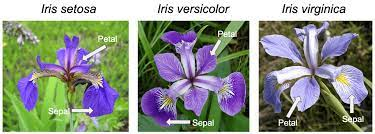

In [39]:
# Random Forest Example
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
# Get Data
from sklearn.datasets import load_iris # Import load_iris function from datasets module

iris = load_iris() # Save the dataset to a variable named iris

X = iris.data # Create X from the dataset's features
y = iris.target # Create y from the dataset's target variable

In [41]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) # Split the data

# Instantiate a Random Forest model
rf_model = RandomForestClassifier(random_state=10, n_estimators=10) # n_estimators is the number of trees

# Fit the model to the training data
rf_model.fit(X_train, y_train)


# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Get the model's accuracy score
from sklearn.metrics import accuracy_score # Import accuracy_score function

accuracy_score(y_test, rf_predictions) # Compare the test labels to the predictions
print("Accuracy score: \n", accuracy_score(y_test, rf_predictions))



Accuracy score: 
 0.9555555555555556


In [42]:
# Feature Importance
# Get the feature importance scores
rf_model.feature_importances_ # We can Calculate the feature importance scores manually by using the Gini index

array([0.02059089, 0.03108265, 0.27130277, 0.67702369])

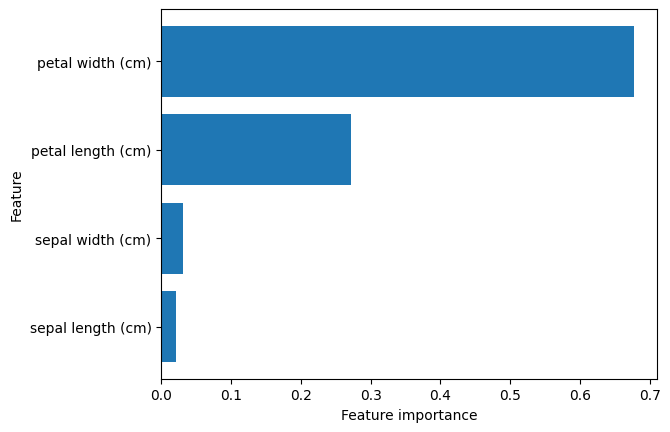

In [44]:
# Draw a bar plot of the feature importance scores
import matplotlib.pyplot as plt # Import matplotlib.pyplot module as plt

plt.barh(range(4), rf_model.feature_importances_) # Create a horizontal bar plot
plt.yticks(range(4), iris.feature_names) # Create y tick labels
plt.xlabel('Feature importance') # Create label for x-axis
plt.ylabel('Feature') # Create label for y-axis
plt.show() # Show the plot

---

`Pros`

`High accuracy`: Random Forest is known for its high accuracy and robustness, even when dealing with complex data and high-dimensional feature spaces.<br>

`Reduced overfitting`: Random Forest can reduce overfitting by using multiple trees with random subsets of features to make predictions,<br>
 which can help to capture more general patterns in the data.<br>

`Outlier detection`: Random Forest can be used to detect outliers in the input data,<br>
 which can help to identify anomalous examples that may need further investigation.<br>

`Variable importance`: Random Forest can provide a measure of variable importance,<br>
 which can help to identify the most informative features in the data.<br>

`Easy to use`: Random Forest is easy to use and requires little tuning of hyperparameters,<br>
 making it a popular choice for both beginners and experts in machine learning.<br>

---
`Cons`

`Slow training time`: Random Forest can be slow to train on large datasets with many trees and features,<br>
 as it requires building and evaluating multiple decision trees for each tree in the forest.<br>

`Memory intensive`: Random Forest can be memory intensive,<br>
 especially when dealing with large datasets and high-dimensional feature spaces.<br>

`Black box`: Random Forest is often considered a black box model,<br>
 as it can be difficult to understand the exact decision-making process of the forest and the individual trees.<br>

`Biased towards categorical features`:Random Forest can be biased towards categorical features with many levels,<br>
 as it may create more splits on these features and ignore other features that may be more informative.<br>

`Overfitting`: Although Random Forest is designed to reduce overfitting,<br>
 it can still overfit on noisy or uninformative features if they are not removed or reduced in importance.<br>

 ---

### Refernces

[IBM - What is Bagging ? ](https://www.ibm.com/topics/bagging#:~:text=Bagging%2C%20also%20known%20as%20bootstrap,be%20chosen%20more%20than%20once.)<br>
[Random Forest Algorithm
](https://www.javatpoint.com/machine-learning-random-forest-algorithm)